In [195]:
# Librerias 

import pandas as pd
import numpy as np
import scipy as sps
import scipy.stats as st
import math


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes

import warnings
warnings.filterwarnings('ignore')

In [196]:
# Data
df = pd.read_csv('data_aula04.csv', header=0, sep=';')
df.shape



(677, 5)

In [197]:

df.describe()

,var1,var2,var3,var4,var5
count,677.000000,677.000000,677.000000,677.000000,6.770000e+02
mean,2.041359,0.278418,3.743123,33.298154,1.166940e+05
std,0.790889,12.799350,0.324061,25.648299,4.204340e+05
min,0.000000,-163.528280,2.488372,0.850000,8.000000e+02
25%,2.000000,-0.002633,3.588958,12.680000,1.081600e+04
50%,2.000000,0.000000,3.687137,26.650000,2.016000e+04
75%,2.000000,0.004437,3.855922,49.820000,5.760000e+04
max,6.000000,164.856576,5.175506,148.130000,6.000000e+06


In [198]:
df.dtypes

var1      int64
var2    float64
var3    float64
var4    float64
var5    float64
dtype: object

In [199]:
df.isna().sum()

var1    0
var2    0
var3    0
var4    0
var5    0
dtype: int64

<Figure size 640x480 with 0 Axes>

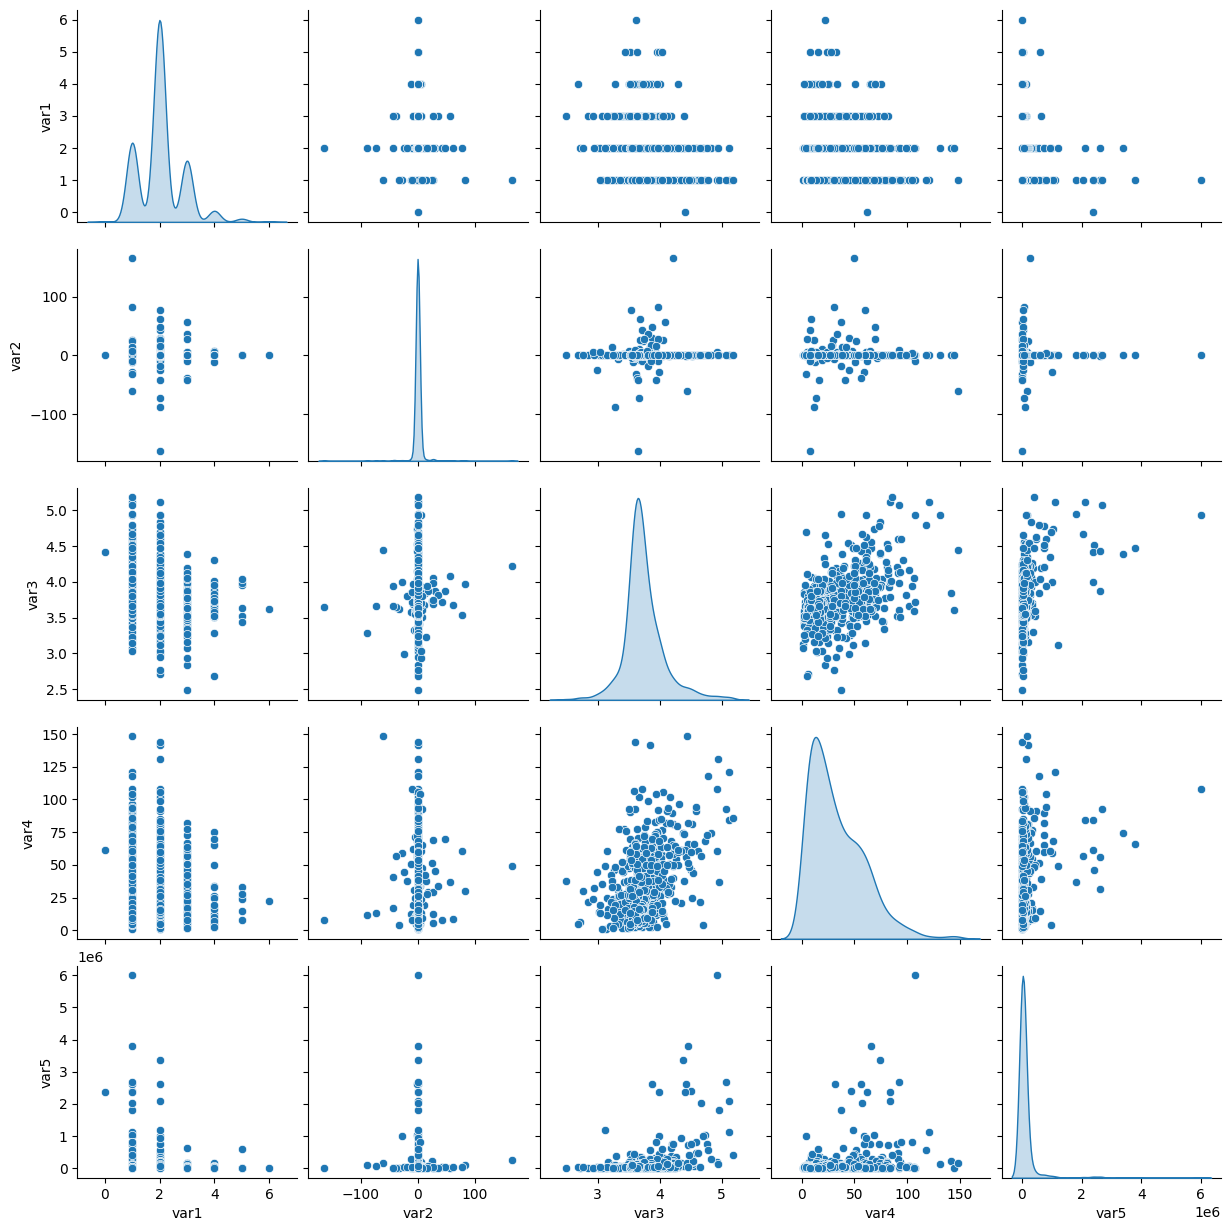

In [200]:

plt.figure()
sns.pairplot(df, diag_kind='kde')
plt.show()

In [201]:
# Eleccion de variables 

var3 = df['var3']
var2 = df['var2']
var4 = df['var4']


array([[<Axes: title={'center': 'var4'}>]], dtype=object)

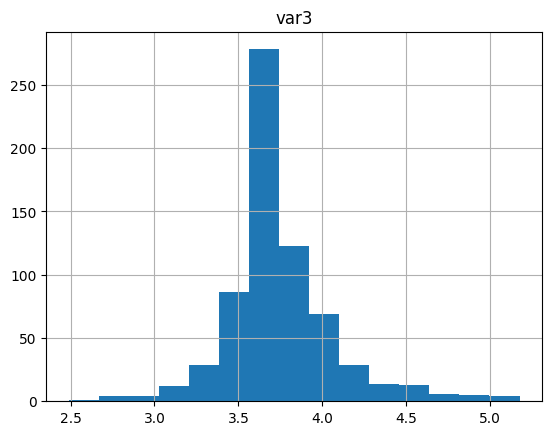

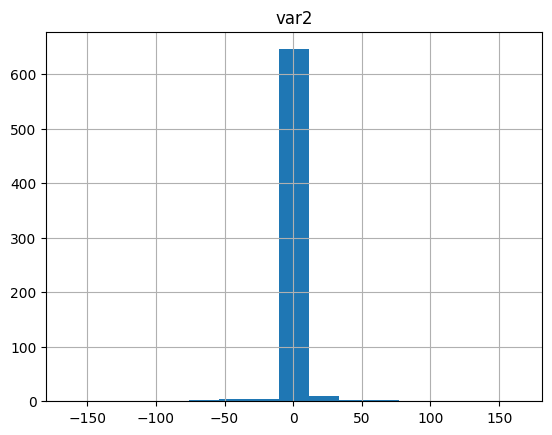

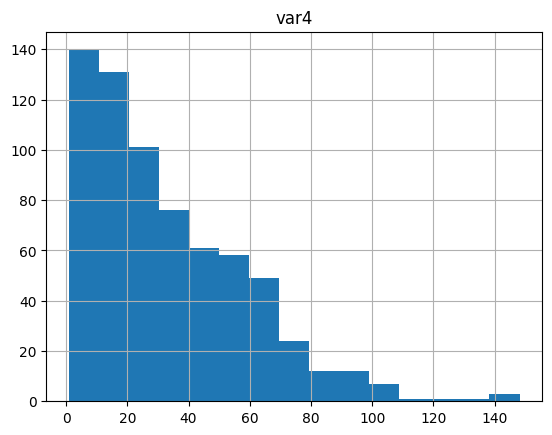

In [202]:
# Histogramas 
df.hist(column='var3', bins=15)
df.hist(column='var2', bins=15)
df.hist(column='var4', bins=15)

In [203]:
import scipy.stats as sps


# Variables seleccionadas
variables = ['var3', 'var2', 'var4']

# Distribuciones continuas
dist_continuas = [
    ('Cauchy', sps.cauchy),
    ('Log-Normal', sps.lognorm),
    ('Gamma', sps.gamma),
    ('Weibull_min', sps.weibull_min)
]



In [204]:
# Diccionario para almacenar los parámetros ajustados
ajustes = {}

# Ajuste de distribuciones a cada variable
for var in variables:
    data = df[var].dropna()  # Eliminar valores nulos

    distribuciones = dist_continuas

    ajustes[var] = {}

    for nombre, dist in distribuciones:
        try:
            params = dist.fit(data)
            ajustes[var][nombre] = params
        except Exception as e:
            ajustes[var][nombre] = f"Error: {e}"  # Guardar error si el ajuste falla

# Mostrar los resultados
for var, distribs in ajustes.items():
    print(f"\nVariable: {var}")
    for nombre, params in distribs.items():
        print(f"  {nombre}: {params}")


Variable: var3
  Cauchy: (3.675090671482402, 0.1205482922135643)
  Log-Normal: (0.11216034737192851, 0.9206418075991395, 2.8046295894920075)
  Gamma: (49.78731484274097, 1.4992465854260781, 0.04506923034154014)
  Weibull_min: (3.864413911611795, 2.45186074070715, 1.414098420952318)

Variable: var2
  Cauchy: (-6.537419557571411e-05, 0.0032968199719153376)
  Log-Normal: (4.780602583794152, -163.52827990428887, 1.952768656442599)
  Gamma: (822.3708514516193, -392.59114592820015, 0.4773559170247519)
  Weibull_min: (2.627171651120716, -32.4063985820429, 36.481056994919385)

Variable: var4
  Cauchy: (23.95549901198716, 14.400354164988203)
  Log-Normal: (0.7325986250744401, -4.098440170744808, 29.224569247112434)
  Gamma: (1.4131155173414474, 0.7802003000967508, 23.01152510235667)
  Weibull_min: (1.2491336955304857, 0.818321633852643, 34.850025489317666)


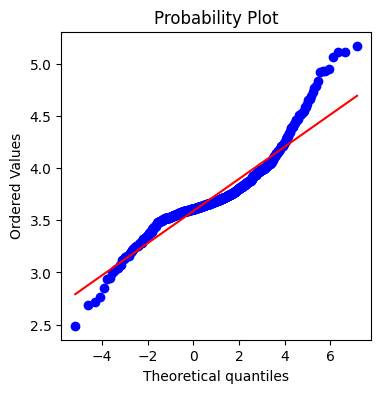

In [205]:
plt.figure(figsize=(4,4))
st.probplot(df['var3'], sparams=(1., 2.) , dist='norm', plot=plt)
plt.show()

In [206]:
# QQ-plot

def qq_plot(data, dist, params, ax):
    
    percs = np.linspace(0, 100, num=100)
    qn_real = np.percentile(data, percs)
    qn_theo = dist.ppf(percs / 100.0, *params[:-2], loc=params[-2], scale=params[-1])

    ax.scatter(qn_theo, qn_real, edgecolor='k', alpha=0.6)
    ax.plot(qn_theo, qn_theo, color='red', lw=2)
    ax.set_title("QQ-Plot")
    ax.set_xlabel("Cuantiles teóricos")
    ax.set_ylabel("Cuantiles empíricos")


In [207]:
# PP-plot

def pp_plot(data, dist, params, ax):
    
    percs = np.linspace(0, 100, num=100)
    cdf_real = np.percentile(data, percs)
    cdf_theo = dist.cdf(cdf_real, *params[:-2], loc=params[-2], scale=params[-1])

    ax.scatter(cdf_real, cdf_theo, edgecolor='k', alpha=0.6)
    ax.plot(cdf_real, cdf_real, color='red', lw=2)
    ax.set_title("PP-Plot")
    ax.set_xlabel("Probabilidades empíricas")
    ax.set_ylabel("Probabilidades teóricas")

In [208]:
# Diccionario para guardar los parámetros de cada distribución
ajustes = {}

for var in variables:
    data = df[var].dropna()  # Eliminar valores nulos si los hay
    ajustes[var] = {}

    for nombre, dist in dist_continuas:
        params = dist.fit(data)  # Ajustar la distribución
        ajustes[var][nombre] = params  # Guardar parámetros

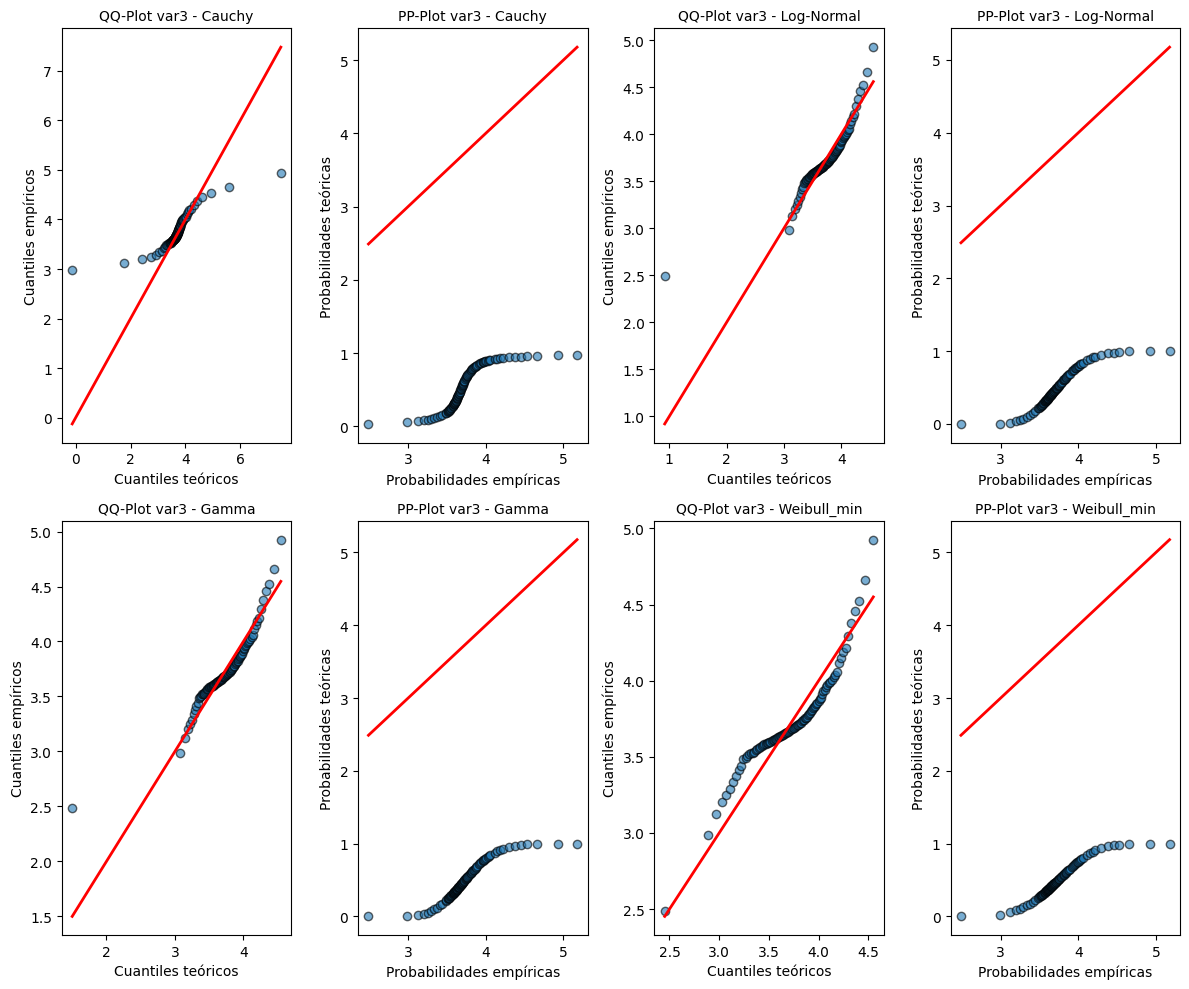

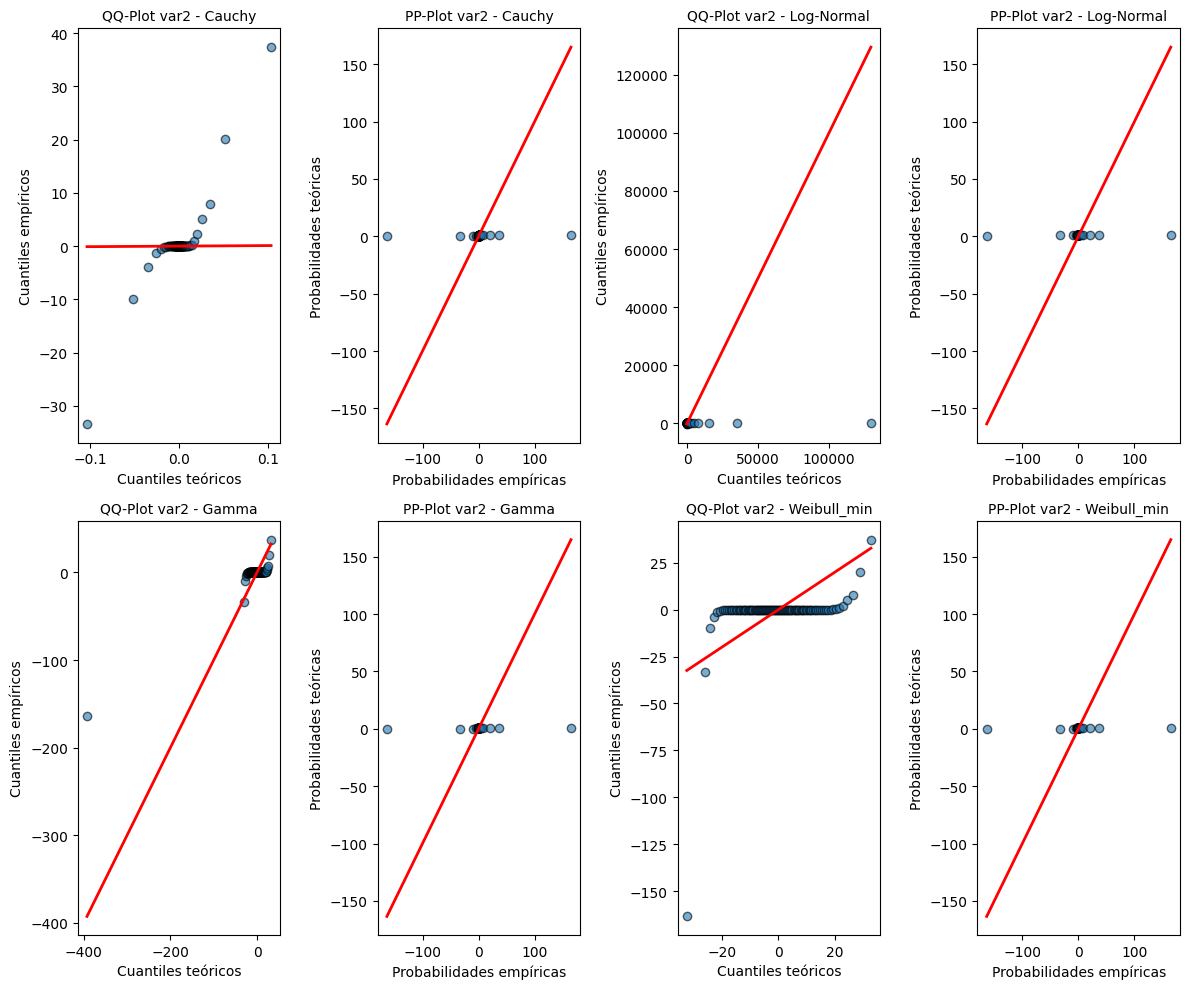

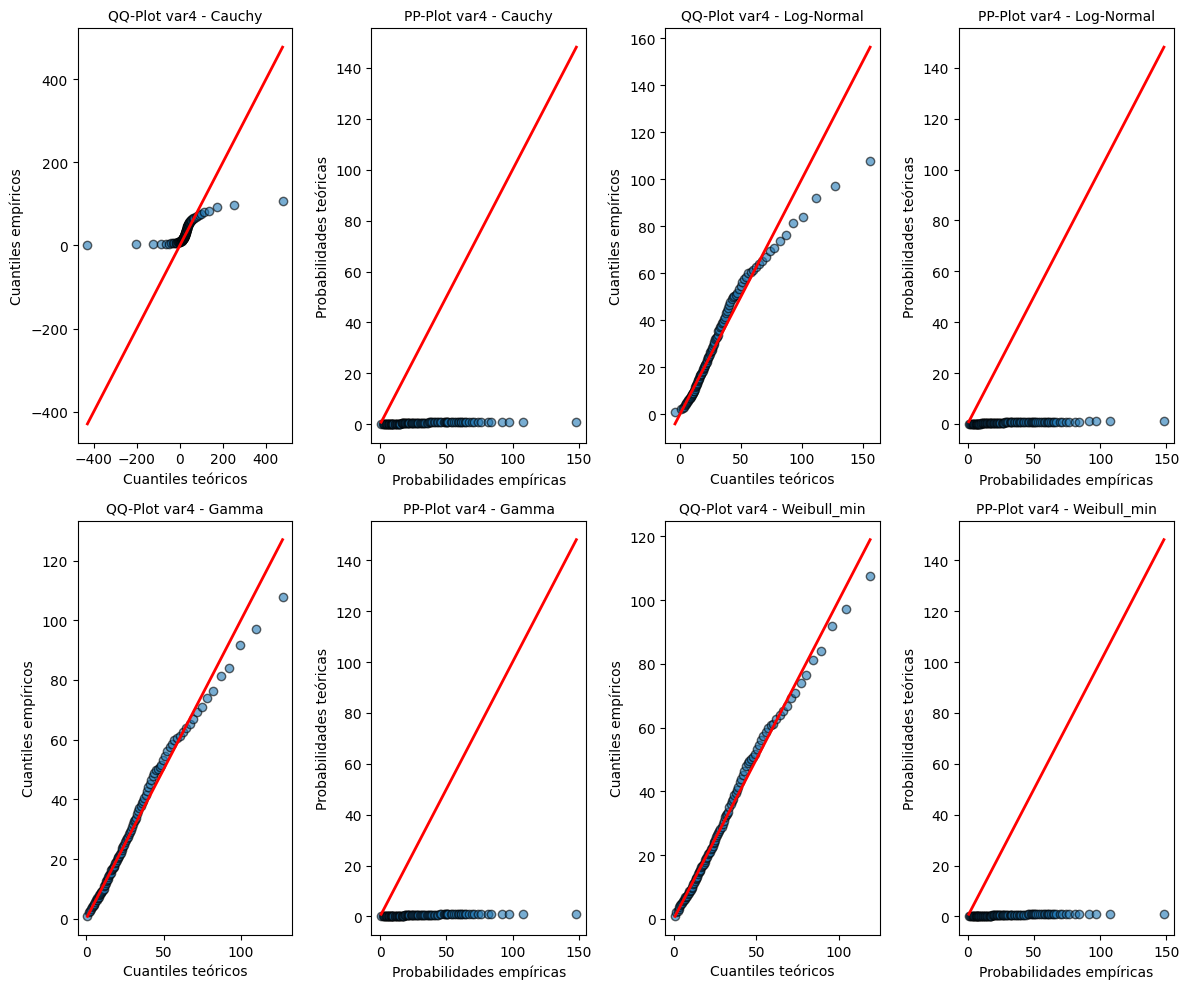

In [209]:

for var in variables:
    data = df[var].dropna()

    # Determinar la cantidad de distribuciones y definir la cuadrícula
    cols = 2  # Dos gráficos por fila (QQ y PP)
    rows = math.ceil(len(dist_continuas) / cols)  # Número de filas necesarias

    # Crear la figura con subgráficas
    fig, axes = plt.subplots(rows, cols * 2, figsize=(cols * 6, rows * 5))  # Doble de columnas para QQ y PP
    axes = axes.flatten()  # Aplanar la matriz de subgráficas

    plot_idx = 0  # Índice de subgráfica

    for nombre, dist in dist_continuas:
        params = ajustes[var][nombre]

        # Títulos y graficado en subgráficas correspondientes
        qq_plot(data, dist, params, axes[plot_idx])
        axes[plot_idx].set_title(f"QQ-Plot {var} - {nombre}", fontsize=10)

        pp_plot(data, dist, params, axes[plot_idx + 1])
        axes[plot_idx + 1].set_title(f"PP-Plot {var} - {nombre}", fontsize=10)

        plot_idx += 2  # Pasamos al siguiente par de gráficos

    # Ocultar subgráficas sobrantes si las hay
    for i in range(plot_idx, len(axes)):
        axes[i].axis("off")

    # Ajustar diseño y mostrar figura
    plt.tight_layout()
    plt.show()

In [210]:
# Grafica de densidades

def plot_density(data, dist, params, ax, nombre):
    sns.histplot(data, kde=True, stat="density", bins=30, label="Datos empíricos", color="blue", alpha=0.5, ax=ax)
    
    x = np.linspace(min(data), max(data), 1000)
    y = dist.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])

    ax.plot(x, y, label=f"Densidad {nombre}", color="red", lw=2)
    ax.set_title(f"{nombre}", fontsize=10)
    ax.legend()

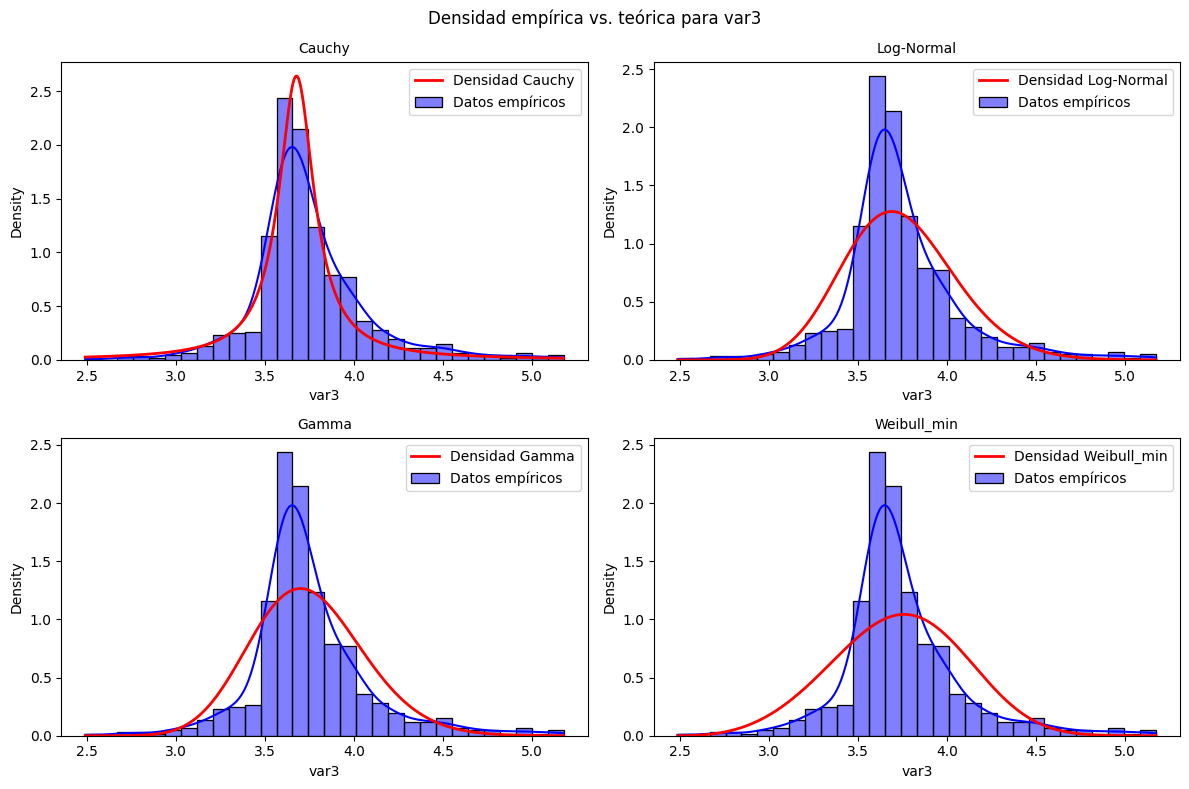

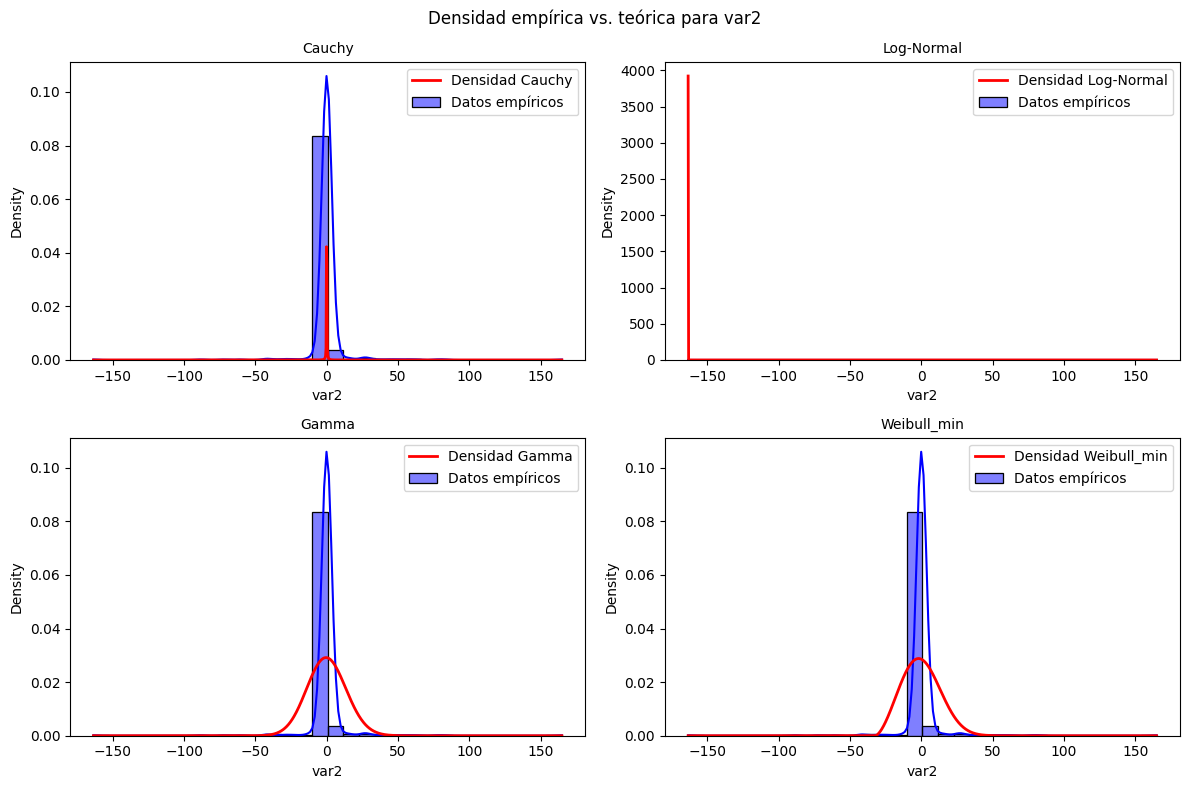

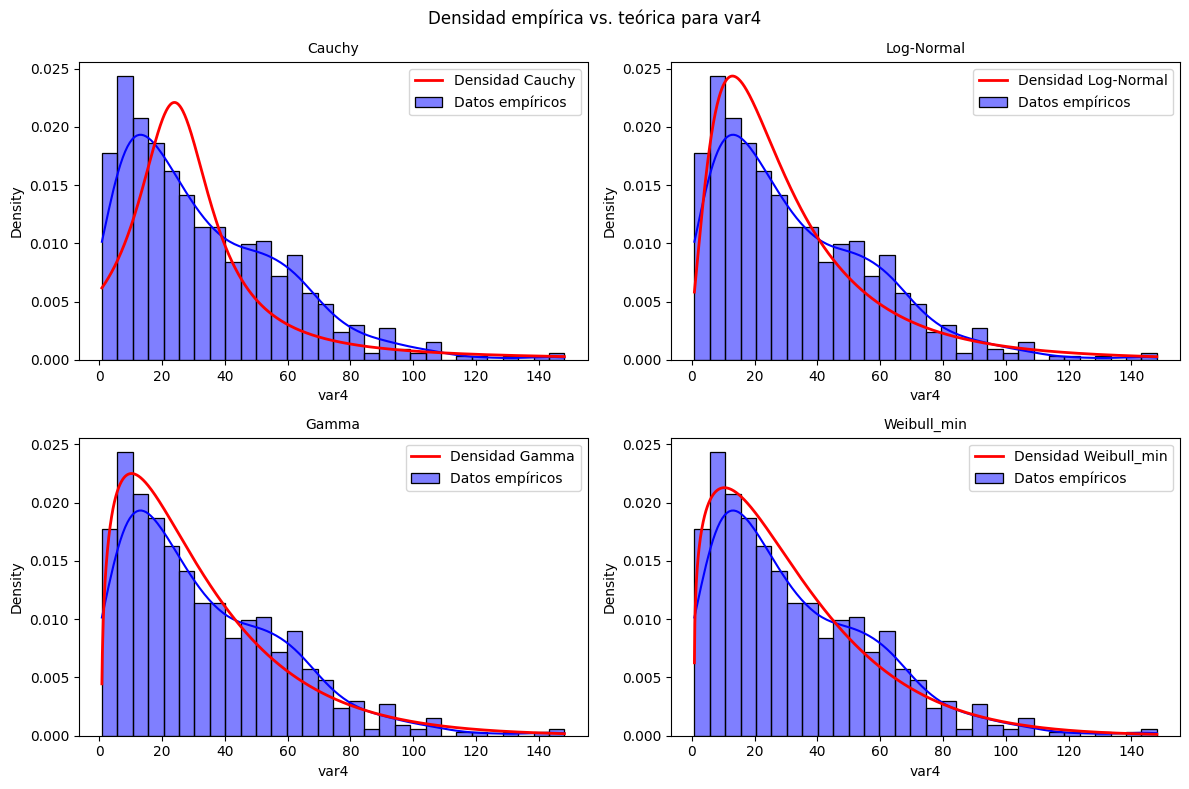

In [211]:
for var in variables:
    data = df[var].dropna()

    # Determinar la cantidad de distribuciones y definir la cuadrícula
    cols = 2  # Número de columnas (dos gráficos por fila)
    rows = math.ceil(len(dist_continuas) / cols)  # Número de filas necesarias

    # Crear la figura con subgráficas
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))  
    axes = axes.flatten()  # Aplanar la matriz de subgráficas

    plot_idx = 0  # Índice de subgráfica

    for nombre, dist in dist_continuas:
        params = ajustes[var][nombre]

        # Graficar en la subgráfica correspondiente
        plot_density(data, dist, params, axes[plot_idx], nombre)

        plot_idx += 1  # Pasamos a la siguiente subgráfica

    # Ocultar subgráficas sobrantes si las hay
    for i in range(plot_idx, len(axes)):
        axes[i].axis("off")

    # Título general, ajuste de diseño y mostrar figura
    fig.suptitle(f"Densidad empírica vs. teórica para {var}", fontsize=12)
    plt.tight_layout()
    plt.show()

In [214]:
ks_results = {}

for var in variables:
    ks_results[var] = []

    for nombre, dist in dist_continuas:
        try:
            # Obtener los parámetros ajustados para la distribución
            params = ajustes[var][nombre]

            # Verificar si los parámetros son válidos
            if len(params) < 2:
                raise ValueError(f"Parámetros insuficientes para {nombre} en {var}: {params}")

            # Realizar la prueba KS
            ks_stat, p_value = sps.kstest(
                data, 
                lambda x: dist.cdf(x, *params[:-2], loc=params[-2], scale=params[-1])
            )
            
            # Guardar resultados
            ks_results[var].append((nombre, ks_stat, p_value))

        except ValueError as ve:
            print(f"Error de valor al probar {nombre} para {var}: {ve}")
            ks_results[var].append((nombre, float('inf'), 0))  # Resultado inválido
        except Exception as e:
            print(f"Error inesperado al probar {nombre} para {var}: {e}")
            ks_results[var].append((nombre, float('inf'), 0))  # Resultado inválido

    # Ordenar los resultados por p-value de mayor a menor
    ks_results[var] = sorted(ks_results[var], key=lambda x: x[2], reverse=True)

    # Mostrar resultados
    print(f"\n### Prueba KS para {var} ###")
    for nombre, ks_stat, p_value in ks_results[var]:
        print(f"{nombre}: KS-Stat={ks_stat:.4f}, p-value={p_value:.2e}")

    # Seleccionar la mejor distribución
    mejor_distribucion = ks_results[var][0][0]
    print(f"➡ Mejor ajuste para {var}: {mejor_distribucion}\n")



### Prueba KS para var3 ###
Cauchy: KS-Stat=0.9042, p-value=0.00e+00
Log-Normal: KS-Stat=0.9374, p-value=0.00e+00
Gamma: KS-Stat=0.9382, p-value=0.00e+00
Weibull_min: KS-Stat=0.9384, p-value=0.00e+00
➡ Mejor ajuste para var3: Cauchy


### Prueba KS para var2 ###
Gamma: KS-Stat=0.5858, p-value=1.89e-221
Weibull_min: KS-Stat=0.5938, p-value=3.03e-228
Cauchy: KS-Stat=0.9988, p-value=0.00e+00
Log-Normal: KS-Stat=0.8231, p-value=0.00e+00
➡ Mejor ajuste para var2: Gamma


### Prueba KS para var4 ###
Weibull_min: KS-Stat=0.0421, p-value=1.75e-01
Gamma: KS-Stat=0.0474, p-value=9.21e-02
Log-Normal: KS-Stat=0.0608, p-value=1.29e-02
Cauchy: KS-Stat=0.1797, p-value=1.37e-19
➡ Mejor ajuste para var4: Weibull_min

